<a href="https://colab.research.google.com/github/mazekehs/User-Visit-Forecasting/blob/main/Prophet_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Changing the directory**

In [1]:
%cd /content/drive/MyDrive/Business Analyst course/Predictive Analytics/Prophet

/content/drive/MyDrive/Business Analyst course/Predictive Analytics/Prophet


#**Importing the Libraries**

In [2]:
import numpy as np
import pandas as pd
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Data
df = pd.read_csv("Udemy_wikipedia_visits.csv")
df.head()

,Date,Udemy,Easter,Christmas,Black Friday
0,1/1/2016,311,0,0,0
1,1/2/2016,564,0,0,0
2,1/3/2016,517,0,0,0
3,1/4/2016,652,0,0,0
4,1/5/2016,756,0,0,0


In [4]:
#Looking into what kind of variables we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1827 non-null   object
 1   Udemy         1827 non-null   int64 
 2   Easter        1827 non-null   int64 
 3   Christmas     1827 non-null   int64 
 4   Black Friday  1827 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.5+ KB


In [5]:
#Summary statistics
df.describe()

,Udemy,Easter,Christmas,Black Friday
count,1827.000000,1827.000000,1827.000000,1827.000000
mean,943.068418,0.002737,0.002737,0.002737
std,531.341700,0.052256,0.052256,0.052256
min,209.000000,0.000000,0.000000,0.000000
25%,542.500000,0.000000,0.000000,0.000000
50%,832.000000,0.000000,0.000000,0.000000
75%,1175.000000,0.000000,0.000000,0.000000
max,2847.000000,1.000000,1.000000,1.000000


from matplotlib import pyplot as plt
_df_0['Udemy'].plot(kind='hist', bins=20, title='Udemy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Easter'].plot(kind='hist', bins=20, title='Easter')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Christmas'].plot(kind='hist', bins=20, title='Christmas')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Black Friday'].plot(kind='hist', bins=20, title='Black Friday')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Udemy', y='Easter', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Easter', y='Christmas', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Christmas', y='Black Friday', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Udemy'].plot(kind='line', figsize=(8, 4), title='Udemy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Easter'].plot(kind='line', figsize=(8, 4), title='Easter')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Christmas'].plot(kind='line', figsize=(8, 4), title='Christmas')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Black Friday'].plot(kind='line', figsize=(8, 4), title='Black Friday')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

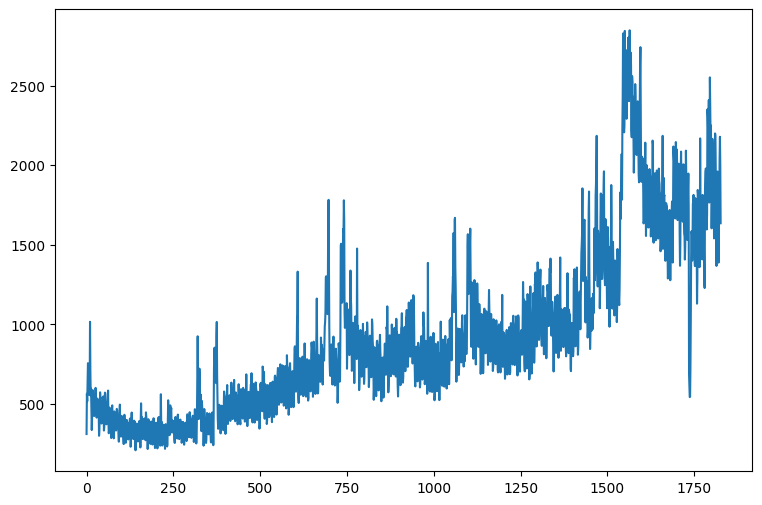

In [6]:
#Plotting
df.Udemy.plot(figsize = (9,6))

**DATA PREPARATION**

In [7]:
#Date variable: %m/%d/%Y -> %Y-%m-%d
df.Date = pd.to_datetime(df.Date,
                         format = "%m/%d/%Y")
df.Date

0      2016-01-01
1      2016-01-02
2      2016-01-03
3      2016-01-04
4      2016-01-05
          ...    
1822   2020-12-27
1823   2020-12-28
1824   2020-12-29
1825   2020-12-30
1826   2020-12-31
Name: Date, Length: 1827, dtype: datetime64[ns]

In [8]:
#Change variable: Date -> ds, time-series (Udemy) -> y
df = df.rename(columns = {'Date': 'ds',
                          'Udemy': 'y'})
df.head(1)

,ds,y,Easter,Christmas,Black Friday
0,2016-01-01,311,0,0,0


**Holidays**

In [9]:
#Easter
easter_dates = df[df.Easter ==1 ].ds
easter = pd.DataFrame({'holiday': 'easter',
                       'ds': easter_dates,
                       'lower_window': -5,
                       'upper_window': 2})

In [10]:
#Black Friday
bf_dates = pd.to_datetime(df[df['Black Friday'] == 1].ds)
bf = pd.DataFrame({'holiday': 'black_friday',
                   'ds': bf_dates,
                   'lower_window': -7,
                   'upper_window': 5})

In [11]:
#combine the holidays
holidays = pd.concat([easter, bf])
holidays

,holiday,ds,lower_window,upper_window
86,easter,2016-03-27,-5,2
471,easter,2017-04-16,-5,2
821,easter,2018-04-01,-5,2
1206,easter,2019-04-21,-5,2
1563,easter,2020-04-12,-5,2
329,black_friday,2016-11-25,-7,5
693,black_friday,2017-11-24,-7,5
1057,black_friday,2018-11-23,-7,5
1428,black_friday,2019-11-29,-7,5
1792,black_friday,2020-11-27,-7,5


In [12]:
#Remove holidays from the main df
df = df.drop(columns = ["Easter", "Black Friday"])
df.head(0)

,ds,y,Christmas


#Prophet Model

In [13]:
#Training and Test Split
test_days = 31
training = df.iloc[:-test_days, : ]
test = df.iloc[-test_days:, : ]
print(test.head(1))
print(training.tail(1))

             ds     y  Christmas
1796 2020-12-01  2393          0
             ds     y  Christmas
1795 2020-11-30  2551          0


In [14]:
#Prophet Model
m = Prophet(growth = 'linear',
            yearly_seasonality = True,
            weekly_seasonality = True,
            daily_seasonality = False,
            holidays = holidays,
            seasonality_mode = 'additive',
            seasonality_prior_scale = 10,
            holidays_prior_scale = 10,
            changepoint_prior_scale= 0.05)
m.add_regressor('Christmas', mode = 'multiplicative')
#m.add_regressor('XXXX')
m.fit(training)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfelw9xgy/vwd4urx1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfelw9xgy/b3u1il0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21979', 'data', 'file=/tmp/tmpfelw9xgy/vwd4urx1.json', 'init=/tmp/tmpfelw9xgy/b3u1il0l.json', 'output', 'file=/tmp/tmpfelw9xgy/prophet_model_mn_npfv/prophet_model-20240709124231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:42:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [15]:
#Regressor coefficients
from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,Christmas,multiplicative,0.0,-0.327456,-0.327456,-0.327456


In [16]:
#create future dataframe
future = m.make_future_dataframe(periods = test_days,
                                 freq = 'D')
future = pd.concat([future, df.iloc[:, 2:]],
                   axis = 1)
future

,ds,Christmas
0,2016-01-01,0
1,2016-01-02,0
2,2016-01-03,0
3,2016-01-04,0
4,2016-01-05,0
...,...,...
1822,2020-12-27,0
1823,2020-12-28,0
1824,2020-12-29,0
1825,2020-12-30,0


In [17]:
#forecasting
forecast = m.predict(future)
forecast.head()
print(forecast.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Christmas', 'Christmas_lower', 'Christmas_upper', 'additive_terms',
       'additive_terms_lower', 'additive_terms_upper', 'black_friday',
       'black_friday_lower', 'black_friday_upper', 'easter', 'easter_lower',
       'easter_upper', 'extra_regressors_multiplicative',
       'extra_regressors_multiplicative_lower',
       'extra_regressors_multiplicative_upper', 'holidays', 'holidays_lower',
       'holidays_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'weekly', 'weekly_lower', 'weekly_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'yhat'],
      dtype='object')


In [18]:
#Holiday assessment
holiday = 'black_friday'
forecast[(forecast[holiday].abs() > 0) & (forecast['ds'] > '2020-01-01')][
    ['ds', holiday]]

,ds,black_friday
1785,2020-11-20,95.562687
1786,2020-11-21,87.102542
1787,2020-11-22,161.298493
1788,2020-11-23,233.588663
1789,2020-11-24,210.207391
1790,2020-11-25,181.024217
1791,2020-11-26,220.776309
1792,2020-11-27,452.450934
1793,2020-11-28,199.829791
1794,2020-11-29,224.503317


In [19]:
#Retrieve the predictions
predictions = forecast.yhat[-test_days:]

In [20]:
#Accuracy assessment
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(test.y, predictions))
print(np.sqrt(mean_squared_error(test.y, predictions)))

187.3028102683454
238.79838072154143


#**Visualization**

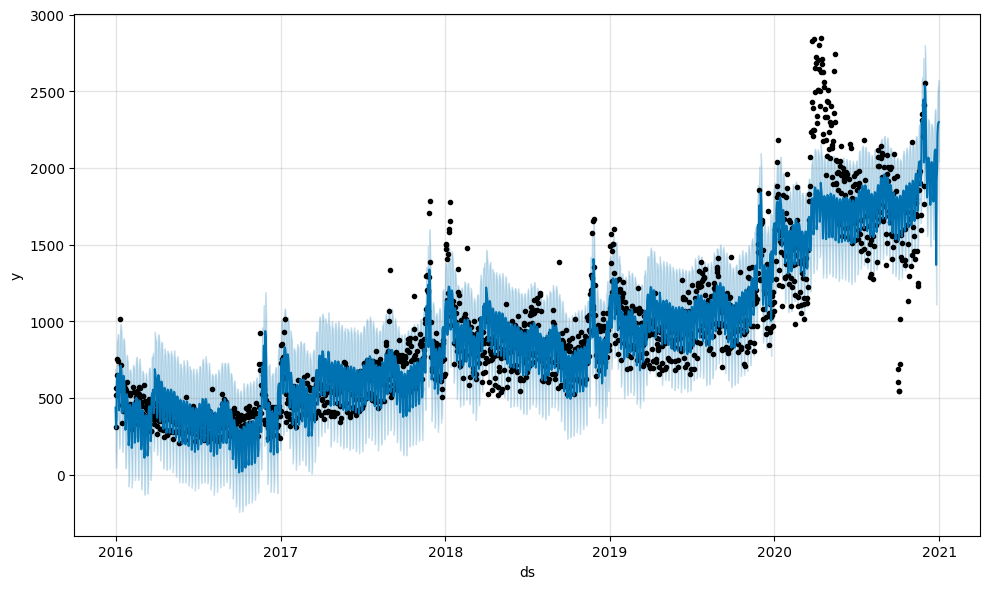

In [21]:
#Visualize the forecast
m.plot(forecast);

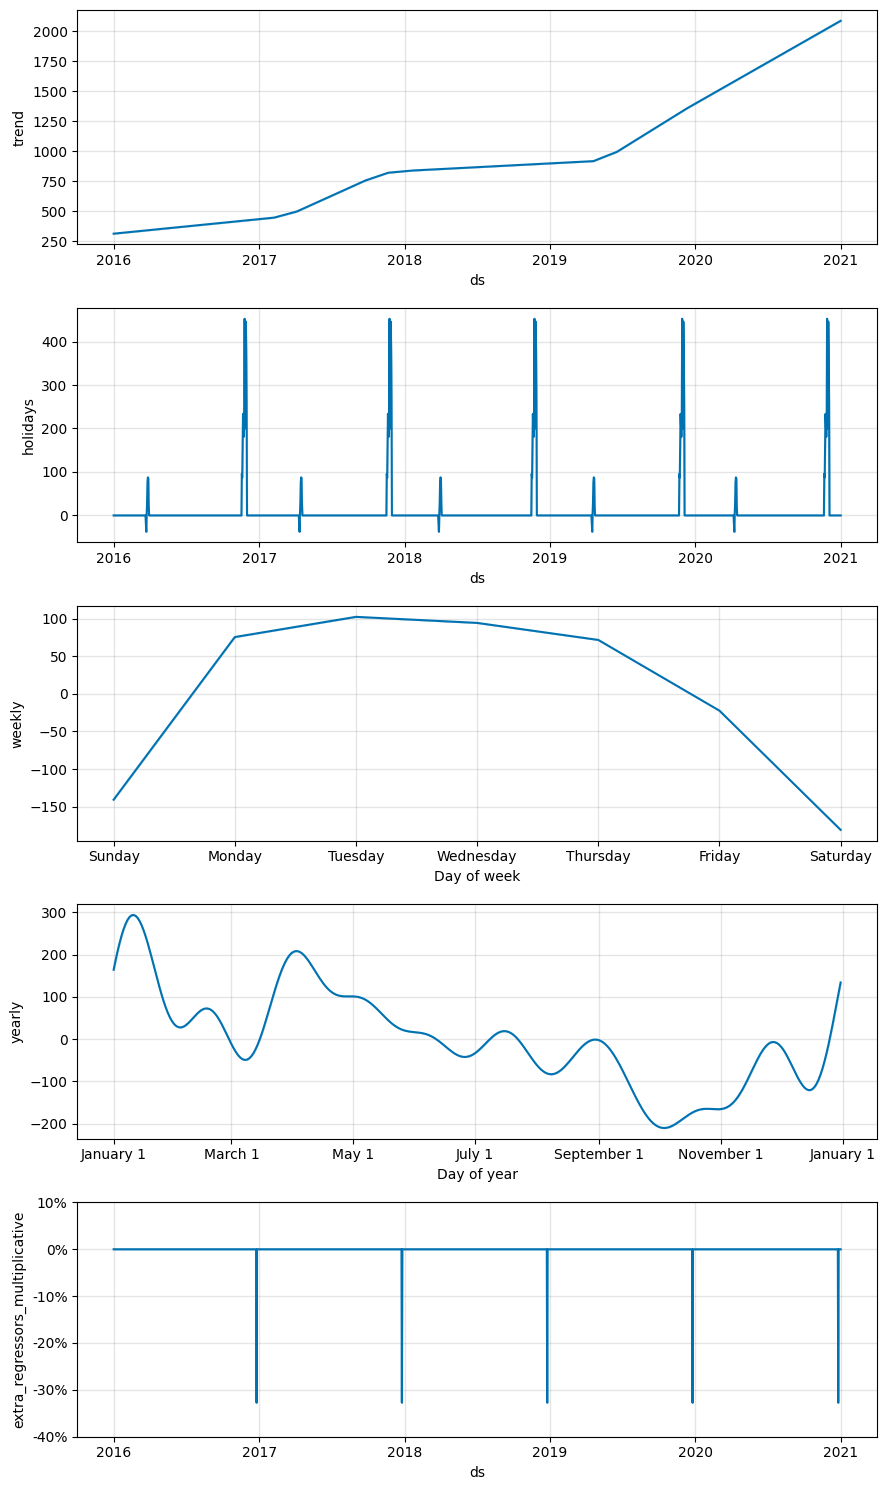

In [22]:
#plot components -> Structural Time Series decomposition
m.plot_components(forecast);

#**Cross-Validation**

In [24]:
#CV
import logging
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

from prophet.diagnostics import cross_validation
df_cv = cross_validation(m,
                         horizon = '31 days',
                         initial = '1450 days',
                         parallel = 'processes')

INFO:prophet:Making 21 forecasts with cutoffs between 2019-12-25 00:00:00 and 2020-10-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7b94c3a55780>


In [25]:
#Output of the CV
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-12-26,1282.681827,1148.078814,1417.553804,1165,2019-12-25
1,2019-12-27,1224.100240,1096.318458,1358.267852,1111,2019-12-25
2,2019-12-28,1102.782630,977.011088,1235.372609,1038,2019-12-25
3,2019-12-29,1164.656977,1027.599060,1291.779783,971,2019-12-25
4,2019-12-30,1373.216749,1245.680005,1504.233146,1192,2019-12-25


In [26]:
#Error assessment
print(mean_absolute_error(df_cv['y'], df_cv['yhat']))
print(np.sqrt(mean_squared_error(df_cv['y'], df_cv['yhat'])))

399.32610768953765
517.55770497542


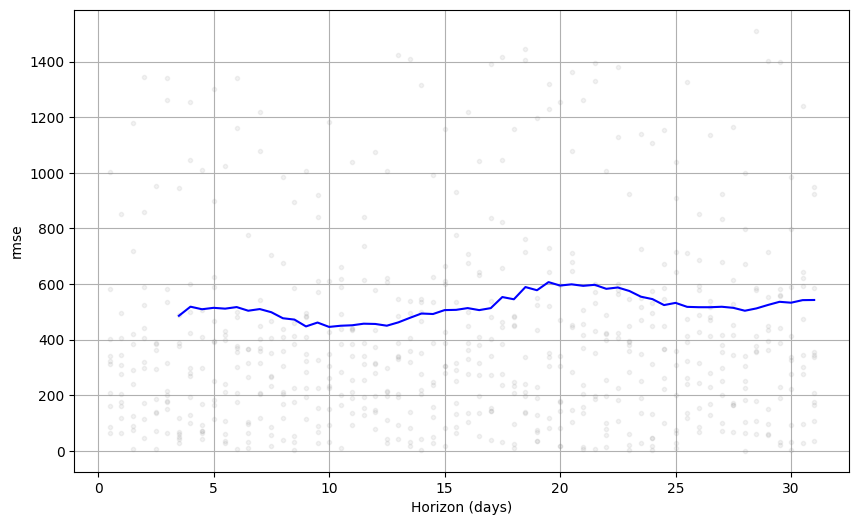

In [27]:
#CV Visualization
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv,
                             metric = 'rmse');

#**Parameter Tuning**

In [29]:
#Parameter Grid
from sklearn.model_selection import ParameterGrid
param_grid = {'seasonality_mode': ['additive', 'multiplicative'],
              'seasonality_prior_scale': [5, 10, 20],
              'holidays_prior_scale': [5, 10, 20],
              'changepoint_prior_scale': [0.01, 0.05, 0.1]}
grid = ParameterGrid(param_grid)
len(list(grid))

54

In [31]:
import logging
from prophet import Prophet
from prophet.diagnostics import cross_validation
from sklearn.metrics import mean_squared_error
import numpy as np

# Set logging level for prophet
logging.getLogger('prophet').setLevel(logging.WARNING)

# Set logging level for cmdstanpy
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

# Empty list to store results
rmse = []

# Start the loop
for params in grid:
    # Build the model
    m = Prophet(
        growth='linear',
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        holidays=holidays,
        seasonality_mode=params['seasonality_mode'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
        holidays_prior_scale=params['holidays_prior_scale'],
        changepoint_prior_scale=params['changepoint_prior_scale']
    )
    m.add_regressor('Christmas', mode='multiplicative')
    m.fit(training)

    # Cross-Validation
    df_cv = cross_validation(
        m,
        horizon='31 days',
        initial='1450 days',
        parallel='processes'
    )

    # Measure and store results
    error = np.sqrt(mean_squared_error(df_cv['y'], df_cv['yhat']))
    rmse.append(error)

# Optionally, print the RMSE results
print(rmse)


[512.1096268334552, 513.0471269349118, 511.58104516938937, 528.1231014355825, 533.3986775663651, 531.0761909475019, 510.80907960745, 511.42032078533566, 509.6071410492654, 529.2351536329251, 532.2040975947116, 528.4039523667085, 510.1059968373385, 510.53853514303154, 511.50268195615985, 527.5132907805727, 530.2959555261509, 531.335504423201, 516.964028754612, 517.3515760597928, 517.8551503330754, 494.05467026143924, 498.5417957503307, 496.1855724909682, 517.8503873232805, 517.55770497542, 516.3854989145922, 498.99512992561586, 496.04798953087715, 496.5523083030603, 516.3507748435864, 517.9781648699436, 517.3122511313803, 496.0035854708229, 494.09041024510526, 494.1442968891902, 503.50649053706434, 505.3500209798872, 501.2476724416202, 450.64943223269984, 452.1037287679349, 449.8426037087044, 502.0669870419642, 503.11616734875304, 503.2618957198877, 449.7335451168321, 450.62312734707854, 452.3135133262051, 506.4621878445942, 504.17533813269176, 502.49475570946913, 451.5629770531854, 448

In [32]:
#Get the best parameters
tuning_results = pd.DataFrame(grid)
tuning_results['rmse'] = rmse
tuning_results

,changepoint_prior_scale,holidays_prior_scale,seasonality_mode,seasonality_prior_scale,rmse
0,0.01,5,additive,5,512.109627
1,0.01,5,additive,10,513.047127
2,0.01,5,additive,20,511.581045
3,0.01,5,multiplicative,5,528.123101
4,0.01,5,multiplicative,10,533.398678
5,0.01,5,multiplicative,20,531.076191
6,0.01,10,additive,5,510.809080
7,0.01,10,additive,10,511.420321
8,0.01,10,additive,20,509.607141
9,0.01,10,multiplicative,5,529.235154
